# **Data Discord**
##### Structure of the DataFrame :
- **ID** : id of the message from discord (unique key)
- **Name** : discord username or channel ({channel_name} in {guild_name})
- **Type** : type of message channel (DM, GROUP_DM, GUILD_TEXT, GUILD_VOICE, PUBLIC_THREAD)
- **Timestamp** : date in %Y-%m-%d %H:%M:%S format
- **Contents** : content of the message
- **Attachments** : image, file link to the message

In [1]:
import json
import os
import re
import pandas as pd
from tqdm import tqdm
from datetime import datetime
from collections import defaultdict
from fonctions import *
from fonctions_extract import *
from collections import Counter
from textblob import TextBlob
from tabulate import tabulate
df = pd.read_csv("package_messages.csv")
MESSAGE_TYPES

['DM', 'GROUP_DM', 'GUILD_TEXT', 'PUBLIC_THREAD']

## Extraction of the package

In [2]:
package_name = ask_package()

Package name :  .zip


In [4]:
extract_zip(package_name) #if the package is not already extracted (this code can take multiple minutes)

In [5]:
INDEX_PATH = f"{package_name[:-4]}/messages/index.json"
MESSAGES_PATH = f"{package_name[:-4]}/messages"

if os.path.exists(f"{package_name[:-4]}_messages.csv"):
    df = pd.read_csv(f"{package_name[:-4]}_messages.csv")
else:
    df = create_dataframe(MESSAGES_PATH, get_conversion_name_dict(INDEX_PATH))
df.to_csv(f"{package_name[:-4]}_messages.csv", index=False)

Processing folder: 100%|██████████| 1271/1271 [00:51<00:00, 24.77folder/s]


## Data cleaning

Remove mudae channels

In [8]:
df = remove_mudae(df)

Change the Name column for DM to be more accurate

In [3]:
df = cleaning_names(df)

## Data visualization

#### Global all time

In [9]:
top_messages(df, 15, ["DM", "GROUP_DM"])

========  ===============  ====================================
TOP 15    DM               GROUP_DM
========  ===============  ====================================
1         Emi - 314 189    Peaky Blindés 🕵🚬 ඞ - 24 555
2         Jooj - 37 917    ici ça bz #gourmand - 15 847
3         Matiya - 20 998  Only Banger - 8 594
4         Lu Man - 20 787  IRL OU J'ME TUE - 3 810
5         Nadjy - 16 780   🤙😔 ඞ - 2 626
6         Nina - 11 371    Double date omg FAIT - 2 084
7         Sabri - 11 258   Escalade lundi 9h nation - 1 806
8         Sao My - 7 626   ALAQUOULE ALAQUOULE - 1 400
9         Nicolas - 7 523  c'est un désastre - 1 287
10        Emy - 5 908      ici ça bz 🔥👉👌 - 1 203
11        Alice - 4 893    BROUETTE BRAQUEMART CLUB ⚔ ☠ - 1 059
12        Lotarie - 4 011  713917944261771374 - 849
13        Alex - 2 921     779309472543146004 - 801
14        Yanis - 2 689    815657404766355487 - 734
15        Marius - 2 289   TOMAN - 626

Total     491 643          76 134
========  ==========

In [10]:
message_statistics(df)

=============  =======  ============  ===============
Type           Count    Percentage    Median Size
=============  =======  ============  ===============
DM             491 643  59.42 %       21.0 characters
GROUP_DM       76 134   9.20 %        24.0 characters
GUILD_TEXT     258 761  31.27 %       21.0 characters
PUBLIC_THREAD  808      0.10 %        3.0 characters
=============  =======  ============  ===============


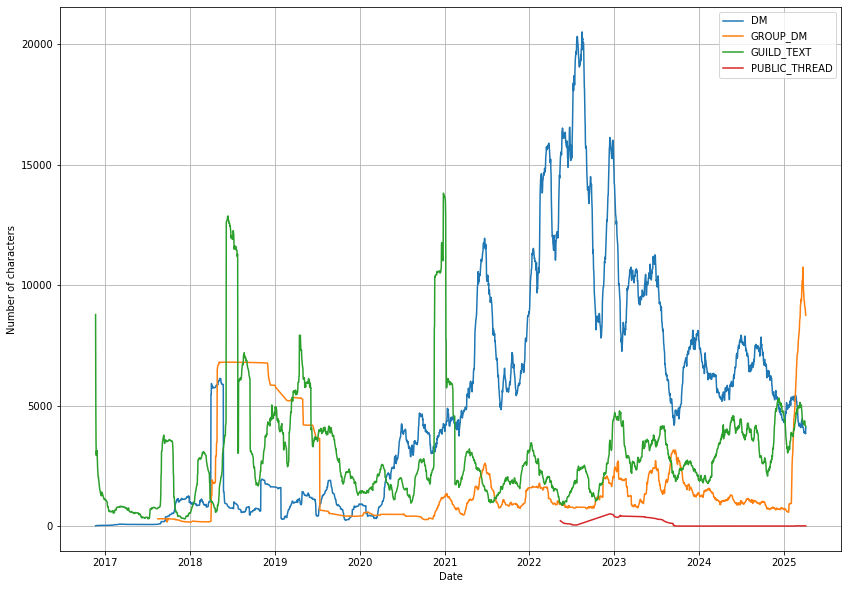

In [11]:
plot_message_statistics(df, window=50, type="character")

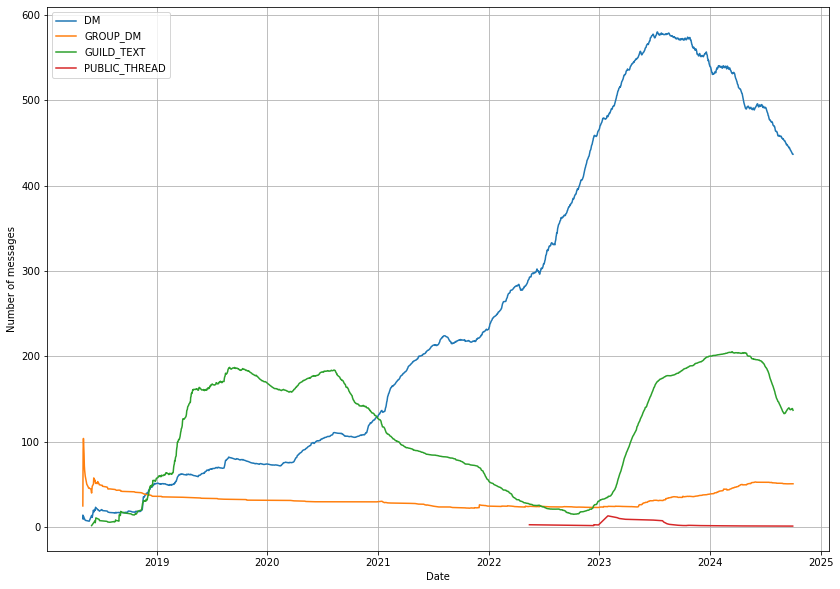

In [29]:
plot_message_statistics(df, window=500)

In [ ]:
taille_message(df)

In [ ]:
stop_words = {"je", "tu", "il", "elle", "on", "nous", "vous", "ils", "elles",
              "le", "la", "les", "l'", "au", "aux", "du", "des", "de", "un", "une",
              "mon", "ma", "mes", "ton", "ta", "tes", "son", "sa", "ses", "ce", "cette", "ces", "moi", "toi",
              "quel", "quelle", "quels", "quelles", "que", "quoi", "qui", "quand", "dont", "où",
              "mais", "ou", "et", "donc", "or", "ni", "car", "ne", "pas", "sans", "si", "plus", "moins", "ni",
              "ça", "ca", "en", "a", "est", "à", "y", "suis", "es", "sommes", "êtes", "sont", "ai", "as", "avons", "avez", "ont",
              "c'est", "j'ai", "va", "t'as", "me", "sur", "là", "oe", "avec", "coup", "enfin",
              "pour", "bien", "dans", "oui", "ouais", "non", "nn", "nan", "bon", "dans", "fait", "tout", "comme", "même",
              "après", "avant", "j'suis", "trop", "c'était", "vraiment", "genre", "faire", "vrai", "juste", "aussi", "peu",
              "te", "t'aime", "veux", "y'a", "sais", "dit", "t'es", "alors", "peux", "rien", "dire", "fais", "pcq"
        }
import pandas as pd
from collections import Counter

def clean_and_count(text, word_counts, stop_words):
    '''
    Clean and normalize the text: lowercase and count words.
    '''

    cleaned_text = ''.join(char for char in text if char.isalnum() or char.isspace() or char == "'").lower()
    words = cleaned_text.split()
    for word in words:
        if word not in stop_words:
            word_counts[word] += 1

def analyze_word_usage(df):
    '''
    Analyze the most frequently used words in the 'Contents' column of the DataFrame.
    '''

    word_counts = Counter()
    df['Contents'].apply(lambda text: clean_and_count(text, word_counts, stop_words))

    most_common_words = word_counts.most_common(10)
    print("Most frequently used words:")
    for word, count in most_common_words:
        print(f"{word}: {count}")

analyze_word_usage(df[df["Name"] == "nathsus"])


## Certain Date

Top 10 since a certain date

In [ ]:
top_10_messages(df_date(df))

In [ ]:
df[df["Timestamp"] == df["Timestamp"].max()]["Contents"].values[0]

In [ ]:
use distplot ?